# Loan Data from Prosper 
## by Ozavize Alabi

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

A description of the variables is as follows: [Dataset Description](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000)



## Preliminary Wrangling


In [93]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [94]:
# load dataset into a pandas dataframe
LoanData = pd.read_csv("prosperLoanData.csv")

#### Data shape and Compostion

In [95]:
# Data shape
LoanData.shape

(113937, 81)

In [96]:
# Composition
LoanData.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [97]:
# first five rows
LoanData.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [98]:
# descriptive statitics
LoanData.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [99]:
# numerical data (integers)


LoanData.select_dtypes(include = 'int64').head()

,ListingNumber,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors
0,193129,36,0,1,0,78,19141,9425,0,0,258
1,1209647,36,2,13,0,0,134815,10000,0,0,1
2,81716,36,0,0,0,86,6466,3001,0,0,41
3,658116,36,16,7,0,16,77296,10000,0,0,158
4,909464,36,2,6,0,6,102670,15000,0,0,20


In [100]:
# numerical data (float)


LoanData.select_dtypes(include = 'float64').head()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,2.0,640.0,...,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0
1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,44.0,680.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0
2,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,480.0,...,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0
3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,113.0,800.0,...,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0
4,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,44.0,680.0,...,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
# selecting numerical data (float)


LoanData.select_dtypes(include = 'float64').columns

Index(['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'Prosper

In [102]:
# categorical data (object)


LoanData.select_dtypes(include = 'object').head()

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,Current,NaN,A,CO,Professional,Employed,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,NaN,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,Current,NaN,A,GA,Skilled Labor,Employed,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,Current,NaN,D,MN,Executive,Employed,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C


### Variables of Interest

In [103]:
# variables to use for analysis
LoanData2 = LoanData[['IncomeRange', 'StatedMonthlyIncome','ListingNumber','LoanStatus', 'Occupation','EmploymentStatus','LoanOriginalAmount','Investors',
                    'IsBorrowerHomeowner','ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'Recommendations']]

## Assess

In [104]:
LoanData2.shape

(113937, 13)

In [105]:
# first five rows

LoanData2.head()

,IncomeRange,StatedMonthlyIncome,ListingNumber,LoanStatus,Occupation,EmploymentStatus,LoanOriginalAmount,Investors,IsBorrowerHomeowner,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Recommendations
0,"$25,000-49,999",3083.333333,193129,Completed,Other,Self-employed,9425,258,True,NaN,NaN,0,0
1,"$50,000-74,999",6125.000000,1209647,Current,Professional,Employed,10000,1,False,A,7.0,2,0
2,Not displayed,2083.333333,81716,Completed,Other,Not available,3001,41,False,NaN,NaN,0,0
3,"$25,000-49,999",2875.000000,658116,Current,Skilled Labor,Employed,10000,158,True,A,9.0,16,0
4,"$100,000+",9583.333333,909464,Current,Executive,Employed,15000,20,True,D,4.0,2,0


In [106]:
# concise summary
LoanData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
ListingNumber                113937 non-null int64
LoanStatus                   113937 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
LoanOriginalAmount           113937 non-null int64
Investors                    113937 non-null int64
IsBorrowerHomeowner          113937 non-null bool
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
Recommendations              113937 non-null int64
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 10.5+ MB


In [107]:
# check for null values

LoanData2.isnull().sum()

IncomeRange                      0
StatedMonthlyIncome              0
ListingNumber                    0
LoanStatus                       0
Occupation                    3588
EmploymentStatus              2255
LoanOriginalAmount               0
Investors                        0
IsBorrowerHomeowner              0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
Recommendations                  0
dtype: int64

In [108]:
# check for duplicates

LoanData2.duplicated().sum()

0

#### Check unique values for some variables of interest

In [109]:
LoanData2['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [110]:
LoanData2['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [111]:
LoanData2['Recommendations'].unique()

array([ 0,  2,  1,  4,  3,  9,  5, 16, 39, 21,  7, 14,  8,  6, 24, 19, 18])

In [112]:
LoanData2['ProsperScore'].unique()

array([ nan,   7.,   9.,   4.,  10.,   2.,  11.,   8.,   5.,   3.,   6.,
         1.])

In [113]:
LoanData2['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

### Issues

1. Missing values in Occupation, EmploymentStatus, CreditGrade, ProsperRating (Alpha), ProsperScore variables

## Clean

In [114]:
LoanData_clean = LoanData2.copy()

In [115]:
LoanData_clean.head()

,IncomeRange,StatedMonthlyIncome,ListingNumber,LoanStatus,Occupation,EmploymentStatus,LoanOriginalAmount,Investors,IsBorrowerHomeowner,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Recommendations
0,"$25,000-49,999",3083.333333,193129,Completed,Other,Self-employed,9425,258,True,NaN,NaN,0,0
1,"$50,000-74,999",6125.000000,1209647,Current,Professional,Employed,10000,1,False,A,7.0,2,0
2,Not displayed,2083.333333,81716,Completed,Other,Not available,3001,41,False,NaN,NaN,0,0
3,"$25,000-49,999",2875.000000,658116,Current,Skilled Labor,Employed,10000,158,True,A,9.0,16,0
4,"$100,000+",9583.333333,909464,Current,Executive,Employed,15000,20,True,D,4.0,2,0


In [116]:
LoanData_clean.isnull().sum()

IncomeRange                      0
StatedMonthlyIncome              0
ListingNumber                    0
LoanStatus                       0
Occupation                    3588
EmploymentStatus              2255
LoanOriginalAmount               0
Investors                        0
IsBorrowerHomeowner              0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
Recommendations                  0
dtype: int64

In [117]:
# filter out null values

LoanData_clean = LoanData_clean[LoanData_clean['Occupation'].notnull()]

In [118]:
LoanData_clean = LoanData_clean[LoanData_clean['ProsperRating (Alpha)'].notnull()]

In [119]:
LoanData_clean = LoanData_clean[LoanData_clean['ProsperScore'].notnull()]

In [120]:
LoanData_clean.head()

,IncomeRange,StatedMonthlyIncome,ListingNumber,LoanStatus,Occupation,EmploymentStatus,LoanOriginalAmount,Investors,IsBorrowerHomeowner,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Recommendations
1,"$50,000-74,999",6125.000000,1209647,Current,Professional,Employed,10000,1,False,A,7.0,2,0
3,"$25,000-49,999",2875.000000,658116,Current,Skilled Labor,Employed,10000,158,True,A,9.0,16,0
4,"$100,000+",9583.333333,909464,Current,Executive,Employed,15000,20,True,D,4.0,2,0
5,"$100,000+",8333.333333,1074836,Current,Professional,Employed,15000,1,True,B,10.0,1,0
6,"$25,000-49,999",2083.333333,750899,Current,Sales - Retail,Employed,3000,1,False,E,2.0,1,0


#### Test

In [121]:
LoanData_clean.isnull().sum()

IncomeRange                  0
StatedMonthlyIncome          0
ListingNumber                0
LoanStatus                   0
Occupation                   0
EmploymentStatus             0
LoanOriginalAmount           0
Investors                    0
IsBorrowerHomeowner          0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
Recommendations              0
dtype: int64

### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Specific variables of interest were chosen for analysis and include a few highlighted below:


- ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website. (Numerical)

- LoanOriginalAmount:	The origination amount of the loan.																		
- LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. (Categorical)

- Occupation:	The Occupation selected by the Borrower at the time they created the listing (Categorical)

- EmploymentStatus:	The employment status of the borrower at the time they posted the listing.

- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are variables that would be best for determing the loan original amount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe IncomeRange, Recomendations, Occupation, EmploymentStatus, Stated Monthly Income will help support my investigation

## Univariate Exploration

> In this section, investigation of distributions of individual variables will be conducted

### Question 1

What is the distribution of original loan amount like?

### Visualization

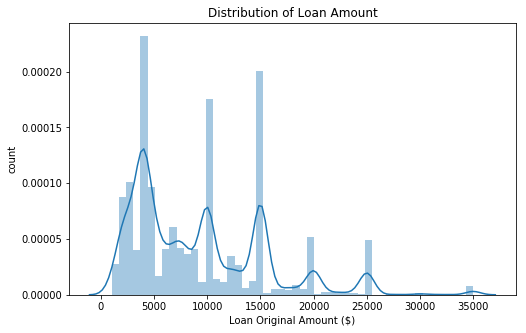

In [122]:
# histogram plot of LoanOriginalAmount feature using seaborn
plt.figure(figsize=[8, 5])
sb.distplot(LoanData_clean['LoanOriginalAmount'], hist = True);
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('count');
plt.title('Distribution of Loan Amount');

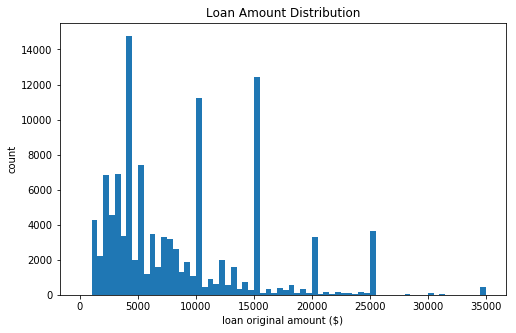

In [123]:
# i'll start with the distribution of LoanOriginalAmount

# With a standard-scaled plot
binsize = 500
bins = np.arange(0, LoanData2['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = LoanData2, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('loan original amount ($)')
plt.ylabel('count')
plt.title('Loan Amount Distribution')
plt.show()

### Observation

The distribution indicates tri-modality with most given loan amounts at 4000, 10000, 15000 US dollars

### Question 2

What is the distribution of StatedMonthlyIncome like?

### Visualization

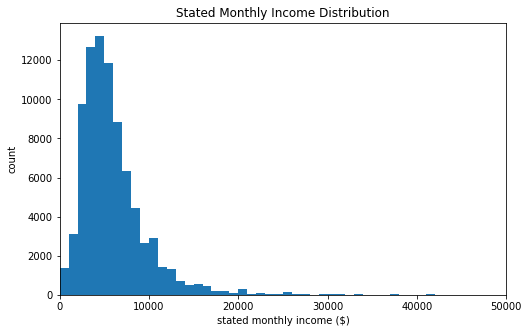

In [124]:
# distribution of StatedMonthlyIncome

# start with a standard-scaled plot
binsize = 1000
bins = np.arange(0, LoanData_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = LoanData_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('stated monthly income ($)')
plt.ylabel('count')
plt.xlim(0, 50000)
plt.title('Stated Monthly Income Distribution')
plt.show()

#### The presence of a long tail is an indication of outliers

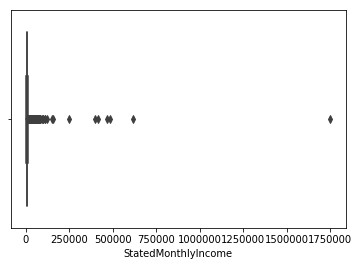

In [125]:
# checking for outliers
sb.boxplot(LoanData_clean['StatedMonthlyIncome']);

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


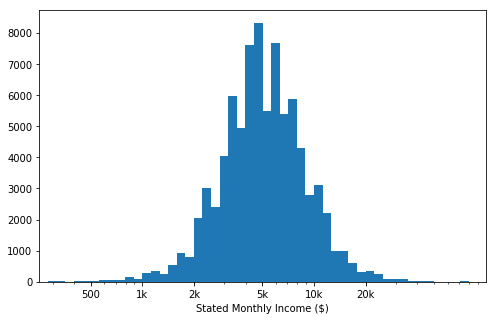

In [126]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(LoanData_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = LoanData_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlim(0, 100000)
plt.xlabel('Stated Monthly Income ($)')
plt.show()

### Observation

The distribution indicates that majority of the custormers have a monthly income between 2000 and 10000 US dollars with a noticable peak monthly income around 5000 dollars which would likely be the median monthly income

In [127]:
# summary statistics of StatedMonthlyIncome
LoanData_clean['StatedMonthlyIncome'].describe()

count    8.352000e+04
mean     5.966707e+03
std      8.296751e+03
min      0.000000e+00
25%      3.500000e+03
50%      5.000000e+03
75%      7.166667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

### Question 3

What Occupation get the most Loans?

### Visualization

In [128]:
# checking for unique occupations in the data

LoanData_clean['Occupation'].unique()

array(['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Other', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', 'Teacher', 'Clergy', 'Attorney', 'Nurse (RN)',
       'Accountant/CPA', 'Analyst', 'Investor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Truck Driver',
       'Administrative Assistant', 'Police Officer/Correction Officer',
       'Social Worker', 'Food Service Management', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping', 'Bus Driver',
       'Engineer - Chemical', 'Doctor', 'Chemist', "Teacher's Aide",
       'Pilot - Private/Commercial', "Nurse's Aide", 'Religious',
       'Ho

In [129]:
# frequency count for each occupation in the data

(LoanData_clean.Occupation.value_counts())

Other                                 21317
Professional                          10542
Executive                              3468
Computer Programmer                    3236
Teacher                                2888
Analyst                                2735
Administrative Assistant               2708
Accountant/CPA                         2574
Sales - Commission                     2350
Skilled Labor                          2180
Nurse (RN)                             2159
Clerical                               2116
Sales - Retail                         2029
Retail Management                      2001
Truck Driver                           1366
Construction                           1326
Police Officer/Correction Officer      1277
Laborer                                1217
Civil Service                          1139
Engineer - Mechanical                  1135
Food Service Management                1005
Engineer - Electrical                   900
Medical Technician              

##### let us filter by cut off of atleast 500 records to be consider as an occupation for visualization

In [130]:
# OccupationCount = LoanData_clean.Occupation.value_counts().to_frame().reset_index()

# OccupationCount.rename(columns = {'index':'Occupation','Occupation':'Count'}, inplace = True)

In [131]:
(LoanData_clean.Occupation.value_counts()>500)

Other                                  True
Professional                           True
Executive                              True
Computer Programmer                    True
Teacher                                True
Analyst                                True
Administrative Assistant               True
Accountant/CPA                         True
Sales - Commission                     True
Skilled Labor                          True
Nurse (RN)                             True
Clerical                               True
Sales - Retail                         True
Retail Management                      True
Truck Driver                           True
Construction                           True
Police Officer/Correction Officer      True
Laborer                                True
Civil Service                          True
Engineer - Mechanical                  True
Food Service Management                True
Engineer - Electrical                  True
Medical Technician              

In [132]:
#InterestedOccupation.Occupation.unique()

In [133]:
# occupations of interest
OccupationList = ['Other', 'Professional', 'Executive', 'Computer Programmer',
       'Teacher', 'Analyst', 'Administrative Assistant', 'Accountant/CPA',
       'Sales - Commission', 'Skilled Labor', 'Nurse (RN)', 'Clerical',
       'Sales - Retail', 'Retail Management', 'Truck Driver',
       'Construction', 'Police Officer/Correction Officer', 'Laborer',
       'Civil Service', 'Engineer - Mechanical', 'Food Service Management',
       'Engineer - Electrical', 'Medical Technician', 'Attorney',
       'Food Service', 'Military Enlisted', 'Tradesman - Mechanic',
       'Social Worker']

In [134]:
InterestedOccupation = LoanData_clean.loc[LoanData_clean.Occupation.isin(OccupationList)]

In [135]:
InterestedOccupation.head()

,IncomeRange,StatedMonthlyIncome,ListingNumber,LoanStatus,Occupation,EmploymentStatus,LoanOriginalAmount,Investors,IsBorrowerHomeowner,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Recommendations
1,"$50,000-74,999",6125.000000,1209647,Current,Professional,Employed,10000,1,False,A,7.0,2,0
3,"$25,000-49,999",2875.000000,658116,Current,Skilled Labor,Employed,10000,158,True,A,9.0,16,0
4,"$100,000+",9583.333333,909464,Current,Executive,Employed,15000,20,True,D,4.0,2,0
5,"$100,000+",8333.333333,1074836,Current,Professional,Employed,15000,1,True,B,10.0,1,0
6,"$25,000-49,999",2083.333333,750899,Current,Sales - Retail,Employed,3000,1,False,E,2.0,1,0


In [136]:
InterestedOccupation[InterestedOccupation.Occupation == 'Other']

,IncomeRange,StatedMonthlyIncome,ListingNumber,LoanStatus,Occupation,EmploymentStatus,LoanOriginalAmount,Investors,IsBorrowerHomeowner,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Recommendations
15,"$50,000-74,999",5500.000000,577164,Defaulted,Other,Other,4000,10,True,HR,5.0,13,0
22,"$1-24,999",118.333333,706927,Current,Other,Other,4000,94,False,HR,2.0,1,0
24,"$25,000-49,999",2333.333333,1046345,Current,Other,Employed,4000,1,True,C,5.0,1,0
29,"$100,000+",10416.666667,1051243,Current,Other,Employed,35000,1,True,A,6.0,1,0
30,"$25,000-49,999",3750.000000,555213,Completed,Other,Employed,10000,30,False,A,9.0,20,0
31,"$25,000-49,999",2250.000000,643927,Current,Other,Other,2000,24,False,HR,5.0,2,0
33,"$100,000+",13083.333333,478891,Completed,Other,Employed,16000,326,False,AA,10.0,7,0
38,"$50,000-74,999",6000.000000,869272,Current,Other,Other,7000,151,True,AA,9.0,1,0
40,"$100,000+",12750.000000,1167746,Current,Other,Self-employed,15000,3,False,C,4.0,1,0
41,"$100,000+",9000.000000,594297,Current,Other,Employed,13000,181,True,B,8.0,7,0


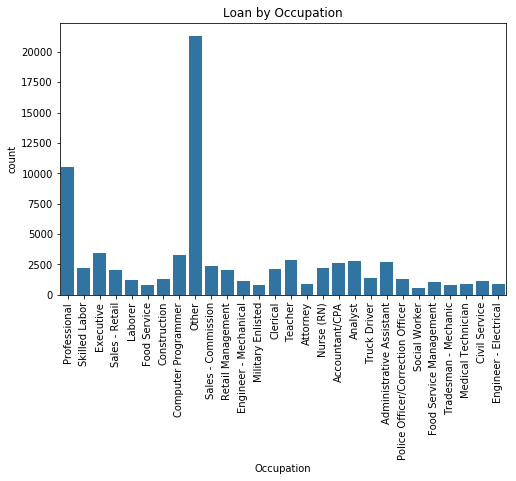

In [137]:
# Occupation distribution 

plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
sb.countplot(data = InterestedOccupation, x= 'Occupation', color=base_color)
plt.title('Loan by Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation=90);

### Observation

From the visualization above we see that the occupation category with the most loans given is 'Other' with 'Professional' following it.

it can also be seen from the value_counts series for occupation that the occupation category with the least loans given are 'Student" 

### Question 4

How many loans are given per income range

### Visualization

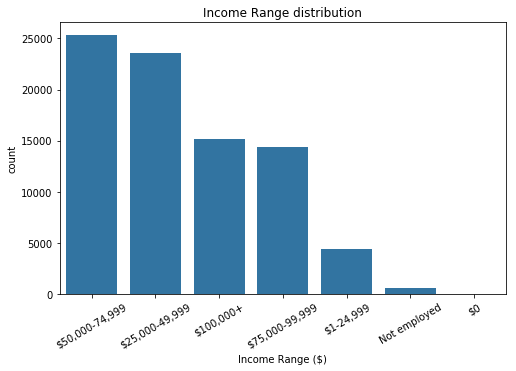

In [138]:
plt.figure(figsize=[8, 5])
sb.countplot(LoanData_clean['IncomeRange'], color=base_color)
plt.title('Income Range distribution')
plt.xlabel('Income Range ($)')
plt.xticks(rotation=30);

### Observation

From the above barplot we see that custormers with the income range ($) 50,000 - 74,999 get the most loans while the income range category of 'Not employed' get the least loans

### Question 5

What is the distribution for the Investors variable, it shows the number of The number of investors that funded the loan.

### Visualization

In [139]:
LoanData_clean.Investors.describe()

count    83520.000000
mean        68.955759
std         95.511709
min          1.000000
25%          1.000000
50%         33.000000
75%         98.000000
max       1189.000000
Name: Investors, dtype: float64

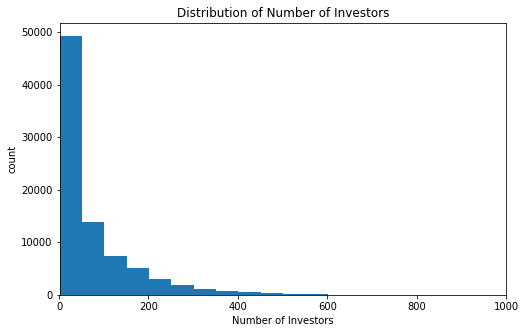

In [140]:
binsize = 50
bins = np.arange(1, LoanData_clean.Investors.max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data=LoanData_clean, x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.xlim(1, 1000)
plt.ylabel('count')
plt.title('Distribution of Number of Investors');

### Observation

It can be observed that the number of investors that funded most of the loans range from 1 to about 200 in number

### Question 6

Visualization for some ordinal categorical variables

### Visualization

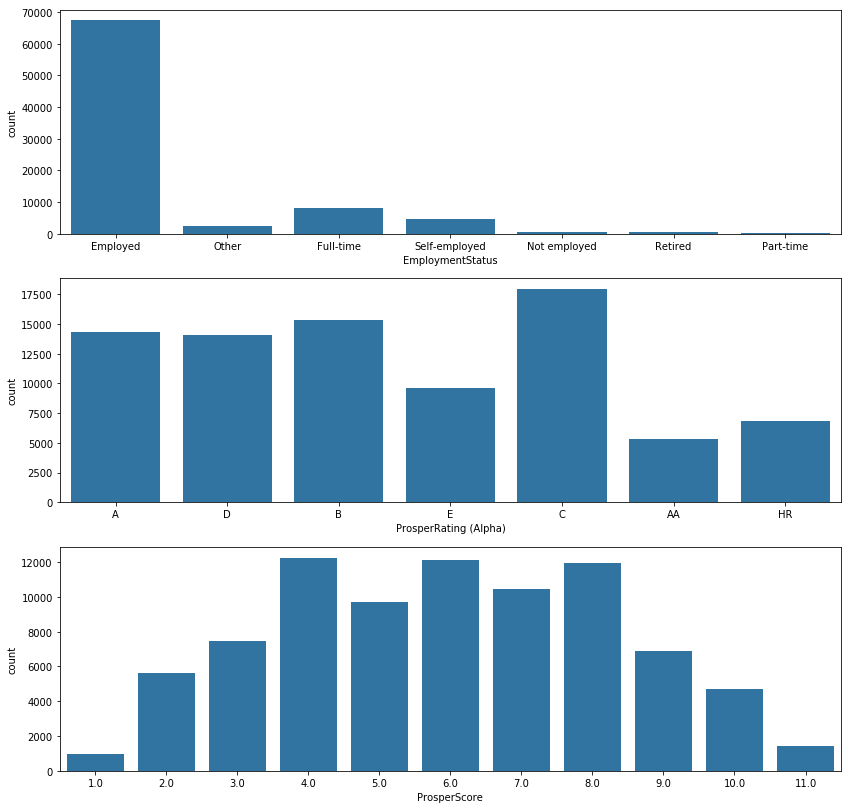

In [141]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [14,14])

default_color = sb.color_palette()[0]
sb.countplot(data = LoanData_clean, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = LoanData_clean, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = LoanData_clean, x = 'ProsperScore', color = default_color, ax = ax[2])

plt.show()

### Observation

- For EmploymentStatus it is observed that most loans were given to customers who are employed while the least given to Students (Part-time)

- For ProsperRating, it is observed the majority of the loans given were to customers with ProsperRating of 'C' while the least amount of loans was given to customers with ProsperRating of 'AA'

- For ProsperScore we observe some form of trimodality at scores of 4,6, and 7 risk levels

### Question 7

What is the distribution of custormers who are house owners?

### Visualization

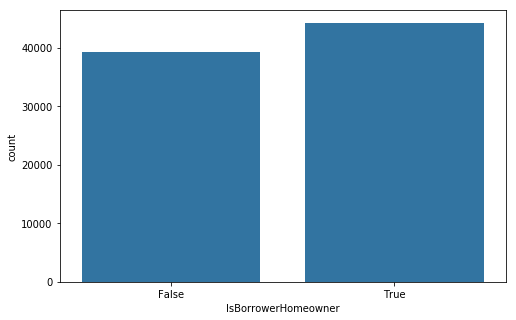

In [142]:
plt.figure(figsize = [8,5])

default_color = sb.color_palette()[0]
sb.countplot(data = LoanData_clean, x = 'IsBorrowerHomeowner', color = default_color);

### Question 8

How is the ListingCategory (numeric) distributed

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 
1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 
7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 
13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 
19 - Vacation, 20 - Wedding Loans

### Visualization

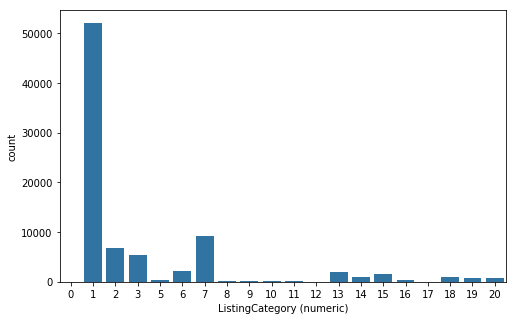

In [143]:
plt.figure(figsize = [8,5])

default_color = sb.color_palette()[0]
sb.countplot(data = LoanData_clean, x = 'ListingCategory (numeric)', color = default_color);

### Observation

It is observed that more loans were given to custormers/borrowers who chose listing category 1 (Debt Consolidation)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For LoanOriginalAmount, The distribution indicates tri-modality with most given loan amounts at 4000, 10000, 15000 US dollars, no unusual points were obsereved.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

On investigating the StatedMonthlyIncome Variable, it was observed that it was a long tail distribution, indicative of the presence of outliers, a log scale transformation was done on the data to cater for outliers and the distribution re-plotted. 

## Bivariate Exploration
Here we'll be looking at relationships between pairs of variables choosen for analysis



### Question 9

How are the features correlated? Let us look at pairwise correlations between features in the data.

In [144]:
# concise summary of data
LoanData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 13 columns):
IncomeRange                  83520 non-null object
StatedMonthlyIncome          83520 non-null float64
ListingNumber                83520 non-null int64
LoanStatus                   83520 non-null object
Occupation                   83520 non-null object
EmploymentStatus             83520 non-null object
LoanOriginalAmount           83520 non-null int64
Investors                    83520 non-null int64
IsBorrowerHomeowner          83520 non-null bool
ProsperRating (Alpha)        83520 non-null object
ProsperScore                 83520 non-null float64
ListingCategory (numeric)    83520 non-null int64
Recommendations              83520 non-null int64
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 10.9+ MB


In [145]:
#grouping both numerical and categorical features

numerical_vars = ['LoanOriginalAmount','StatedMonthlyIncome','Investors','Recommendations','ListingCategory (numeric)']

categorical_vars = ['ProsperRating (Alpha)','IsBorrowerHomeowner','EmploymentStatus','Occupation', 'ProsperScore']

### Visualization

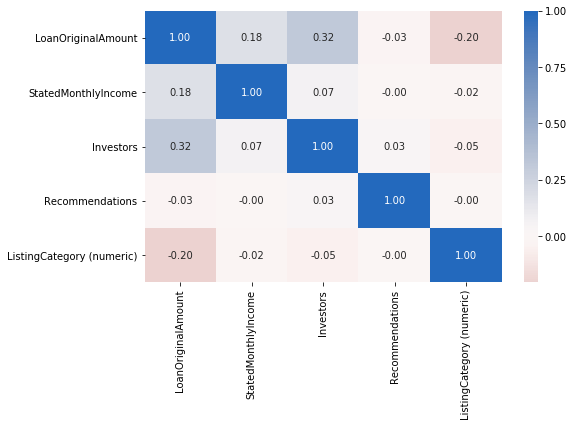

In [146]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(LoanData_clean[numerical_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

### Observation

from the heat map we can observe that a minute positive relationship exist between Investors and LoanOriginalAmount(0.32), we can also observe that some form of relationship exist between StatedMonthlyIncome and LoanOriginalAmount(0.18) further inverstigation with more records and features is required to be certain.

### Question 10

Lets look at correlations between variables using a scatter plot

### Visualization

LoanData_clean.shape= (83520, 13)
LoanData_clean.shape= (500, 13)


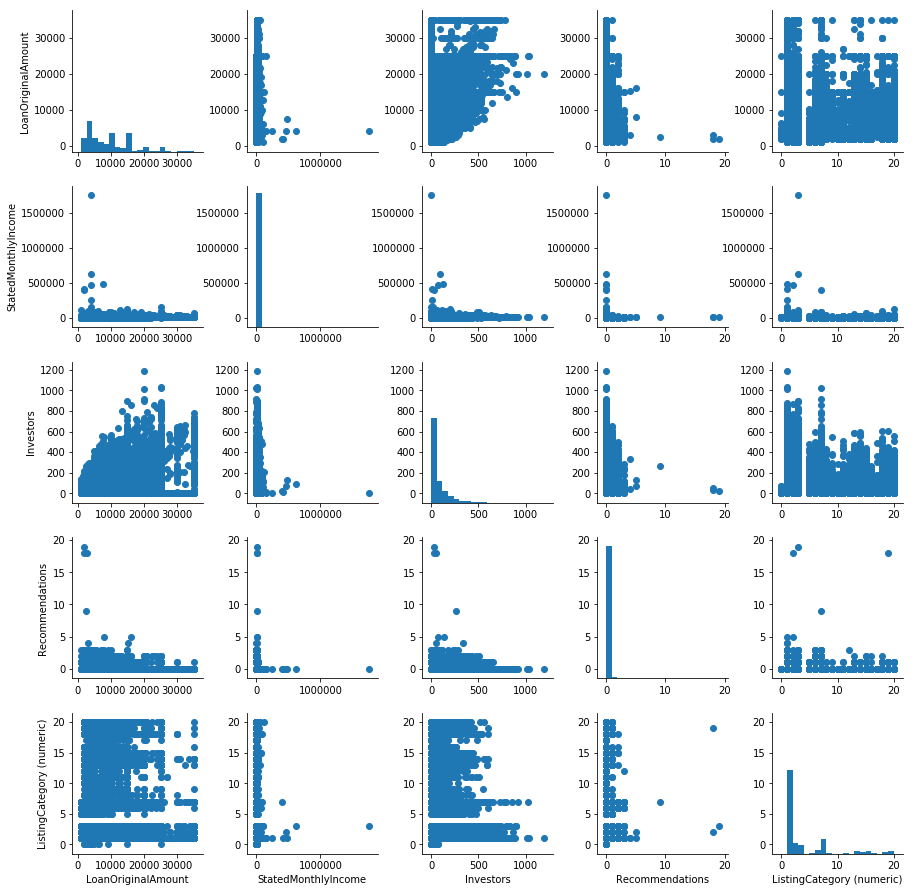

In [147]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("LoanData_clean.shape=",LoanData_clean.shape)
LoanData_clean_samp = LoanData_clean.sample(n=500, replace = False)
print("LoanData_clean.shape=",LoanData_clean_samp.shape)

g = sb.PairGrid(data = LoanData_clean, vars = numerical_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Observation

Some form of relationship can be seen in the scatter plot between Inverstors and LoanOriginalAmount

### Question 11

How does LoanOriginalAmount and StatedMonthly correlated with the categorical variables?

### Visualization

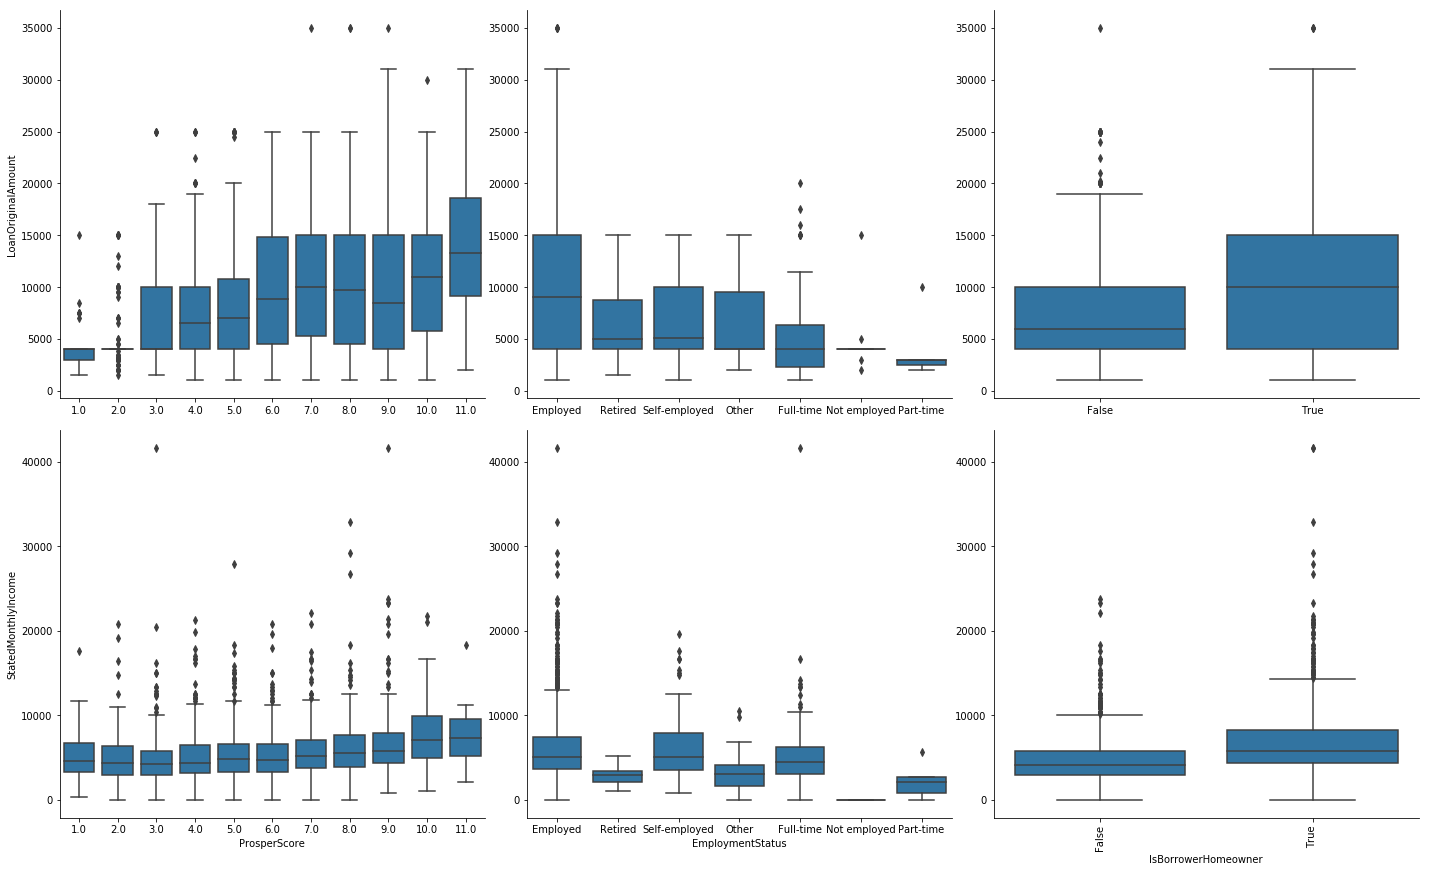

In [148]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.



LoanData_clean_samp = LoanData_clean.sample(n=2000, replace = False)
categoric_vars = ['ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner']

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = LoanData_clean_samp, y_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome'], x_vars = categoric_vars, size = 6, aspect = 1.1)
g.map(boxgrid)
plt.xticks(rotation = 90)
plt.show();

### Obsrvation

Custormers with ProsperScore of 11, are selfemployed and are home owners seem to get the most loan amounts, while custormers with ProsperScore of 1 are full time employed and not home owners seem to get the least loan amounts, Which should be subject to further investigation.

### Question 12

What kind of relationship exist between the categorical variables

### Visualization

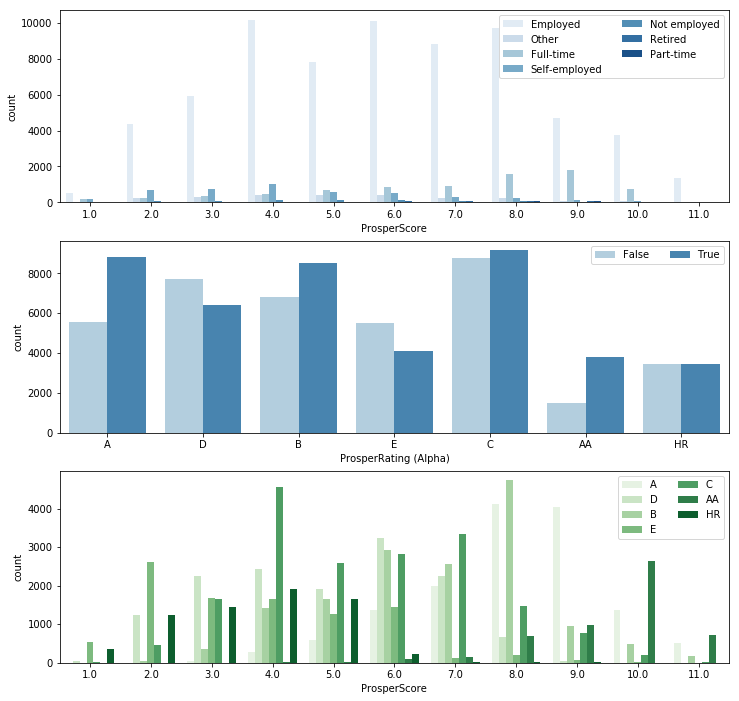

In [149]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = LoanData_clean, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')
plt.legend(loc = 1, ncol = 2)
# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = LoanData_clean, x = 'ProsperRating (Alpha)', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = LoanData_clean, x = 'ProsperScore', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Some form of relationship can be seen in the scatter plot between Inverstors and LoanOriginalAmount

- Custormers with ProsperScore of 11, are selfemployed and are home owners seem to get the most loan amounts, while custormers with ProsperScore of 1 are full time students and not home owners seem to get the least loan amounts, Which should be subject to further investigation.

- 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was observed that custormbers with ProsperRating A, B and C and are home owners seem to get the most loans

## Multivariate Exploration

Here we would explore how some categorical measures play into the relationship between LoanOriginalAmount and Investors

### Question 13

How does the IsBorrwerHomeowner feature affect LoanOriginalAmount and Investors

### Visualization

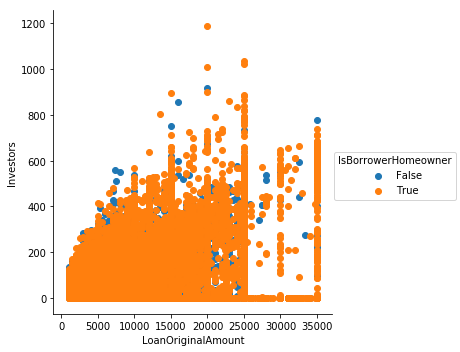

In [150]:
g = sb.FacetGrid(data = LoanData_clean, hue = 'IsBorrowerHomeowner', size = 5);
g.map(plt.scatter,'LoanOriginalAmount', 'Investors');

g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There was some form of slight correlation between Investors and LoanOriginalAmount, although it is uncertain if there are features that strengthen each other. Perhaps on investigation with more features, we can be certain.

### Were there any interesting or surprising interactions between features?

it is uncertain, further investigation with more features is recommended.

## Conclusions
The follow Steps highlight the operations taken for the data exploration:

- Data Importation

- Data Preprocessing

- Univariate Analysis

- Bivariate Analysis

- Multivariate Analysis

In [151]:
## Saving LoanData_clean to a CSV

LoanData_clean.to_csv('LoanData_clean.csv')